# Librerías a utilizar

In [2]:

from dotenv import load_dotenv
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

# modelado
from sklearn.model_selection import train_test_split

# escalado
from sklearn.preprocessing import StandardScaler

# Algoritmo 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#Guardar el modelo 
import joblib


## Objetivo de este data frame es predecir si un paciente tiene diabetes o no. 

## Paso 1 - Cargar conjunto de datos. 

- Pregnancies. Número de embarazos del paciente (numérico)
- Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
- BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)
- SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
- Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
- BMI. Índice de masa corporal (numérico)
- DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)
- Age. Edad del paciente (numérico)
- Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

In [3]:
df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Podemos apreciar en la tabla que no hay variables categóricas y hay 7  númericas enteras y 2 númericos con decimales. Ademas se puede apreciar que no faltan datos que en todas las filas tienen los mismos números esto nos podriá decir que no hay valores nulos. 

# 2. Preparación y Limpieza de Datos

In [6]:
df.duplicated().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool>

El conteo es 0 por lo cual no hay filas duplicadas.

# 1.1 Eliminacion de datos irrelevantes. 

- De momento no voy a eliminar ningun dato ya que ninguno considero relevante. Esto me dara mejor toma de decision cuando grafique y compare.

# 1.2 Conteo de los NaN por columna. 

- No es necesario hacerlo ya que el data frame venia sin valores nulos, en el caso de que los tuviera se borrarian en el anterior paso.

# PASO 3 

- Análisis Univariante: 
  - Variables Numéricas Enteras (histograma). 
    - Ojo, recuerda que en el eje "Y" representa las personas, anuncios, plantas, etc de nuetsro data set.
    - El eje x muestra el rango de los valores a analizar . 

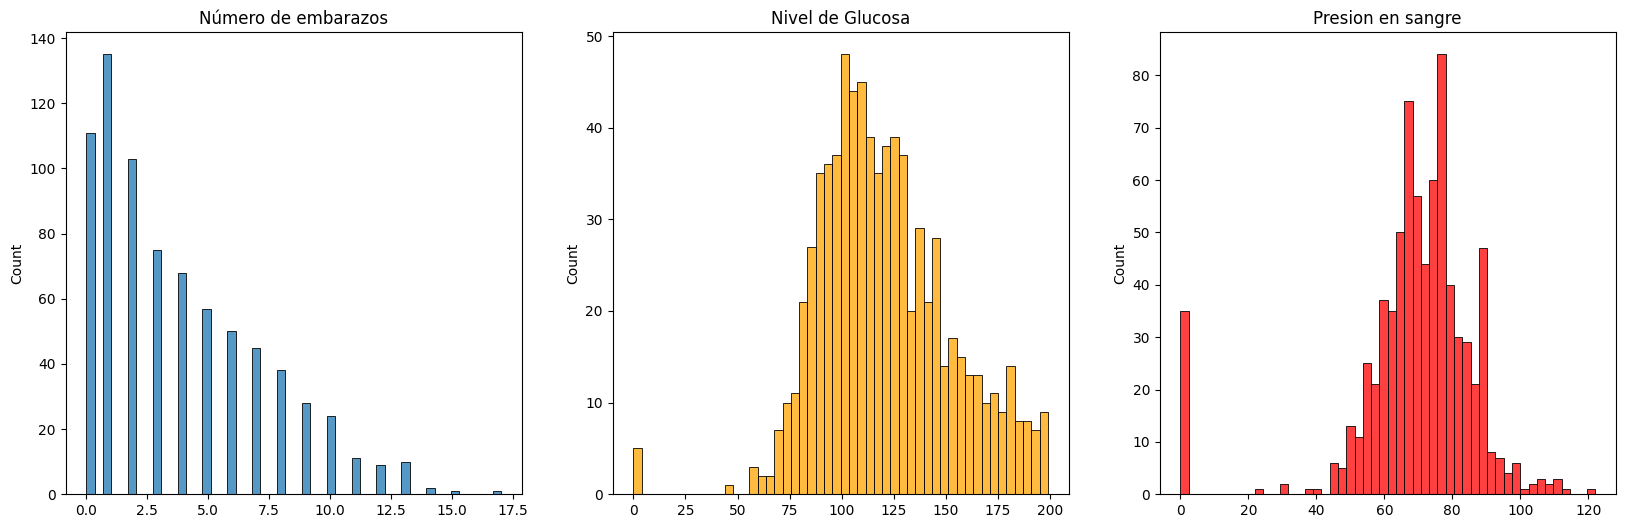

In [7]:
fig, axis = plt.subplots(1, 3, figsize = (20, 6))

sns.histplot( ax = axis[0], data = df, x = "Pregnancies", bins=50).set(title='Número de embarazos', xlabel = None)
sns.histplot( ax = axis[1], data = df, x = "Glucose", bins=50, color="orange").set(title='Nivel de Glucosa', xlabel = None)
sns.histplot( ax = axis[2], data = df, x = "BloodPressure", bins=50, color="red").set(title='Presion en sangre', xlabel = None)

plt.show()

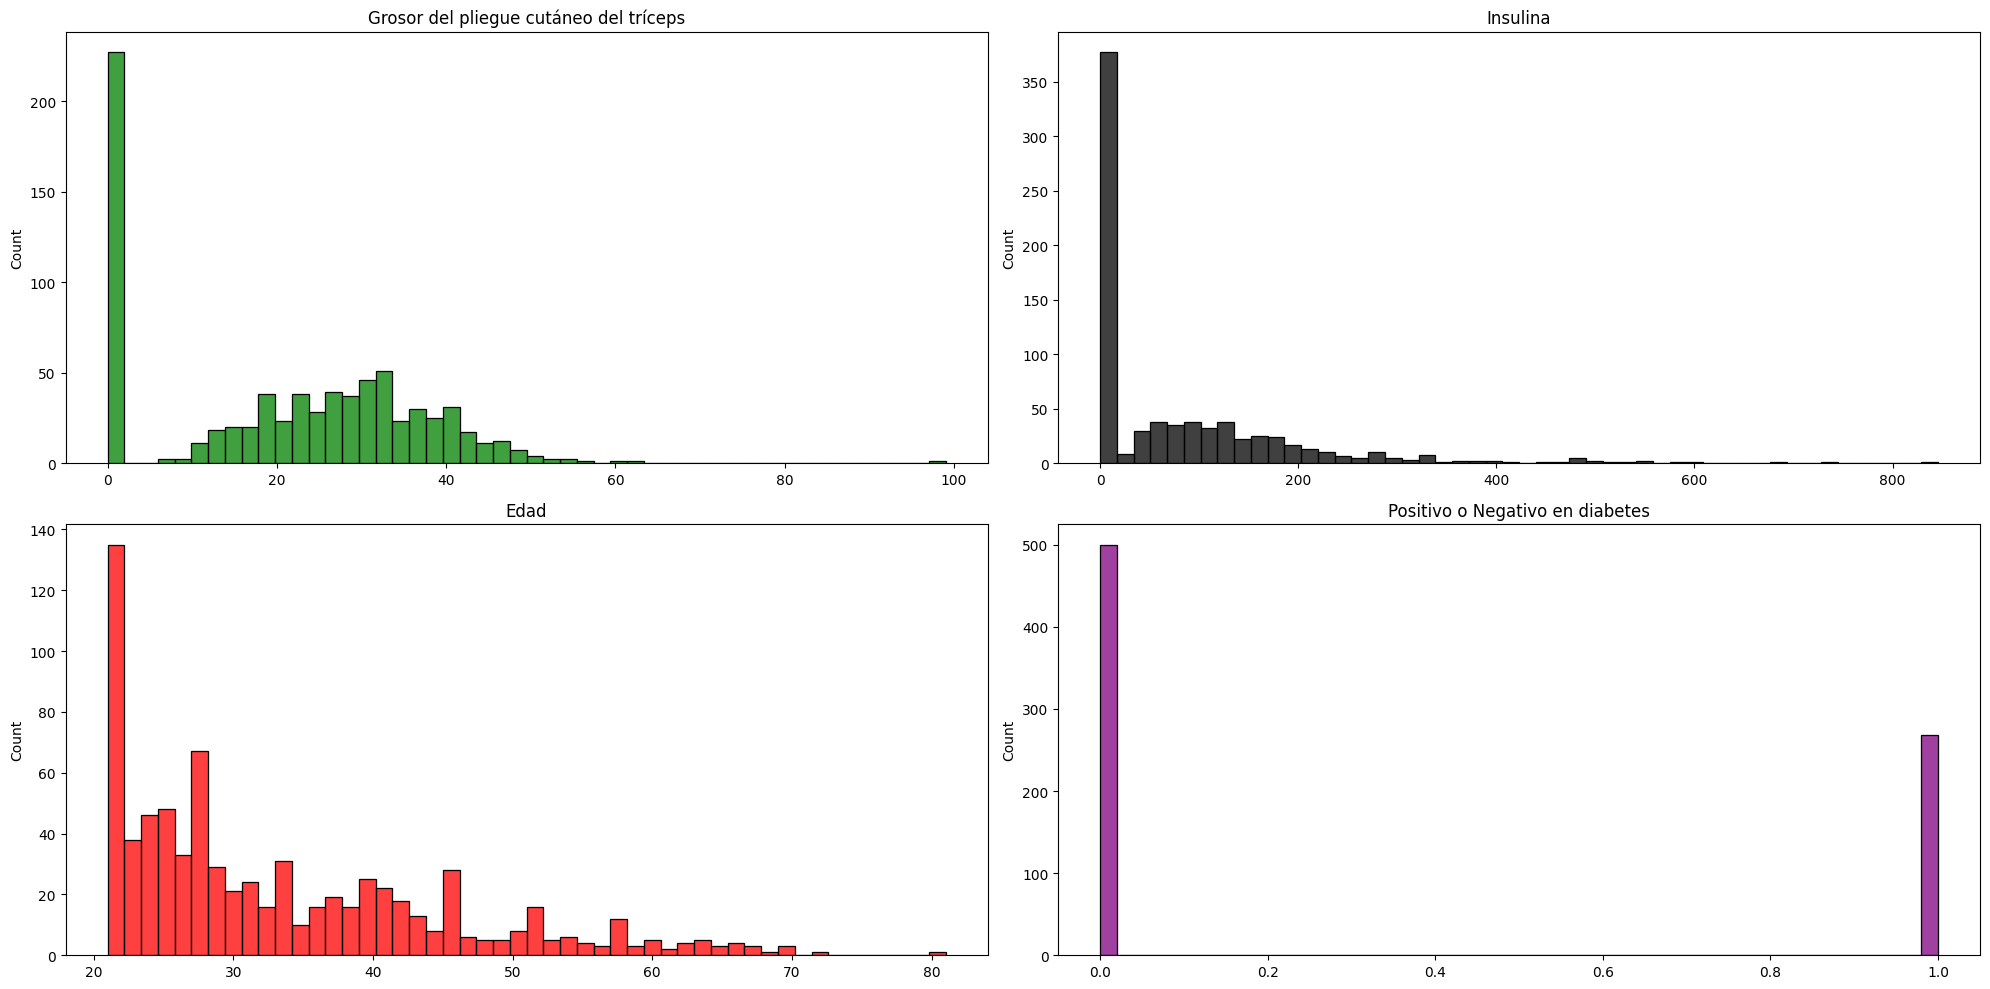

In [8]:
fig, axis = plt.subplots(2, 2, figsize = (20, 10))

sns.histplot( ax = axis[0,0], data = df, x = "SkinThickness", bins=50, color="green").set(title='Grosor del pliegue cutáneo del tríceps', xlabel = None)
sns.histplot( ax = axis[0,1], data = df, x = "Insulin", bins=50, color="black").set(title='Insulina', xlabel = None)
sns.histplot( ax = axis[1,0], data = df, x = "Age", bins=50, color="red").set(title='Edad', xlabel = None)
sns.histplot( ax = axis[1,1], data = df, x = "Outcome", bins=50, color="purple").set(title='Positivo o Negativo en diabetes', xlabel = None)
plt.tight_layout()

plt.show()

 - Variables Numéricas con decimales (histograma). 
    

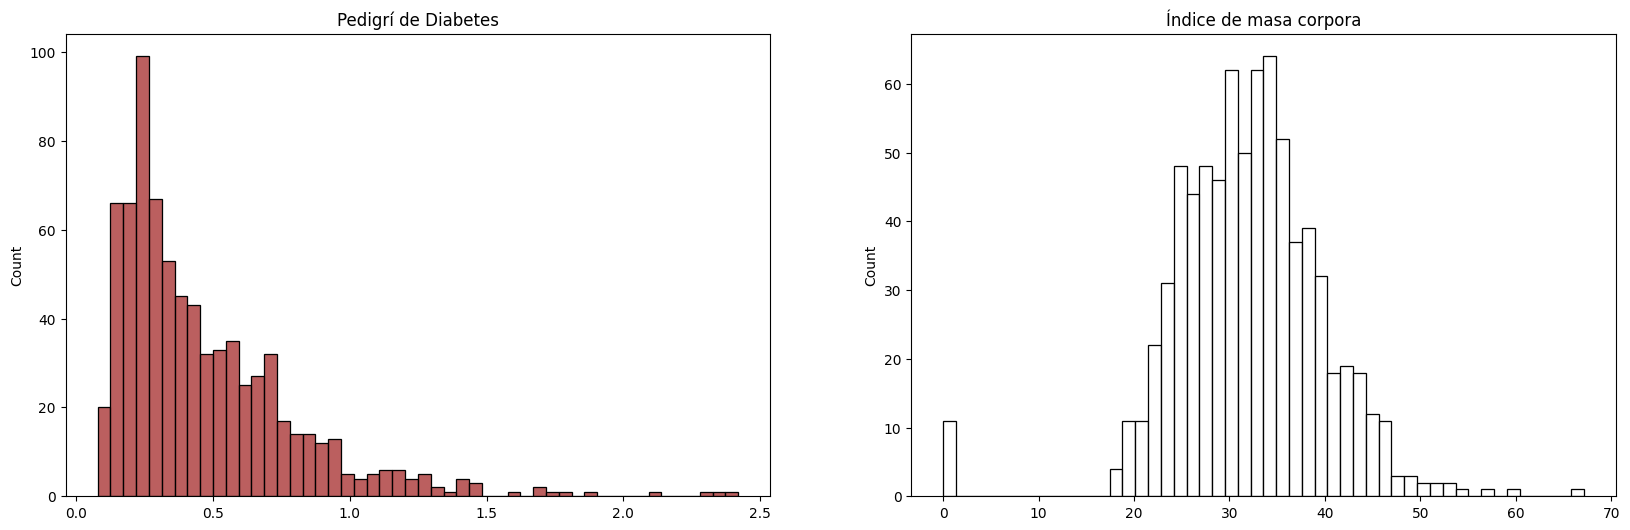

In [9]:
fig, axis = plt.subplots(1, 2, figsize = (20, 6))

sns.histplot( ax = axis[0], data = df, x = "DiabetesPedigreeFunction", bins=50, color="brown").set(title='Pedigrí de Diabetes', xlabel = None)
sns.histplot( ax = axis[1], data = df, x = "BMI", bins=50, color="white").set(title='Índice de masa corpora', xlabel = None)
plt.show()

# Paso 4 

- Análisis Multivariante (Relacionar las variables entre ellas)
- Variable objetivo : Outcome ya que es la que define el proposito de nuestro análisis
- En este caso al ser todas númericas realizaremos un gráfico de calor. 

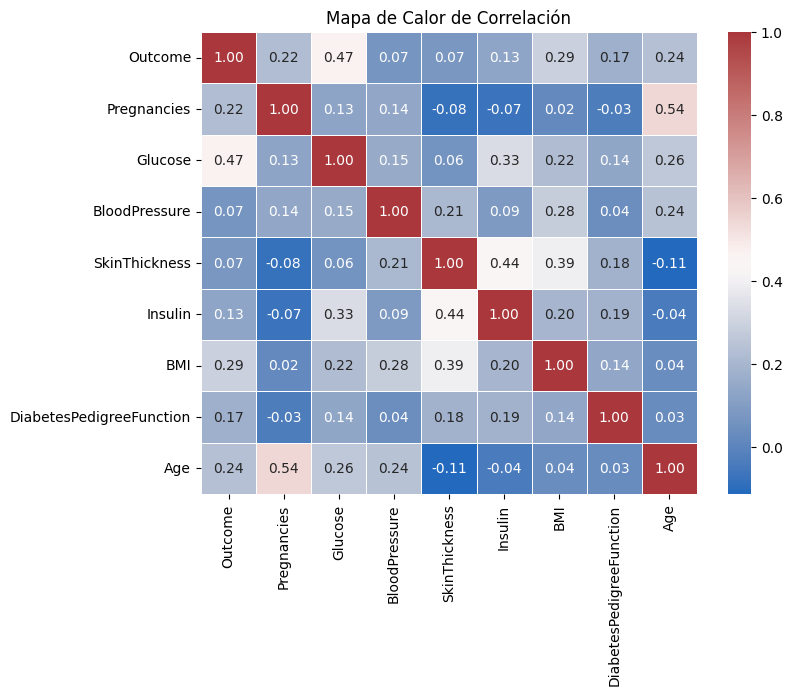

In [10]:
variables_relacionar = ['Outcome', 'Pregnancies', 'Glucose', 
    'BloodPressure', 'SkinThickness', "Insulin","BMI", "DiabetesPedigreeFunction", "Age"]

matriz_correlacion = df[variables_relacionar].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True,fmt=".2f",cmap='vlag',linewidths=.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

#Análisis del mapa de calor: 
- Podemos apreciar que hay una relacion positiva moderada entre Outcome y glucosa esto podria decrinos que a mayor glucosa en sangre tienes más probabilidad de tener diabetes. 
- Entre las variables que utilizo como herramientas por asi decirlo podemos ver que: 
  - Hay una relacion fuerte entre :
    - Pregnacies y age (puede resultar obvio ya que a mayor edad suelen aumentar los embarazos).
    - Skinthickness y insulin eso nos puede decir que las personas con un mayor pliegue cutaneo tienden a tener niveles más altos de insulina.
    - Skinthickness y BMI tienen una relacion ya que tiene que ver con la grasa corporal de la persona. 

# Ingenieria de atributos

# Paso 5 
-Tratar Datos Faltantes
  - Glucose, BloodPressure, SkinThickness, BMI y Insulin
- Aqui lo que hacemos es remplazar esa cantidad de 0 por la mediana de esas columnas con la finalidad de que nuestro modelo no interprete esos 0 como datos a tomar en cuenta.  

In [11]:

df["Insulin_missing"] = (df["Insulin"] == 0).astype(int)
df["Skin_missing"]   = (df["SkinThickness"] == 0).astype(int)


cols_imposibles = ["Glucose", "BloodPressure", "BMI"]

for col in cols_imposibles:
    mediana = df[df[col] != 0][col].median()
    df[col] = df[col].replace(0, mediana)


df[["Glucose", "BloodPressure", "BMI", "Insulin_missing", "Skin_missing"]].head() 

,Glucose,BloodPressure,BMI,Insulin_missing,Skin_missing
0,148,72,33.6,1,0
1,85,66,26.6,1,0
2,183,64,23.3,1,1
3,89,66,28.1,0,0
4,137,40,43.1,0,0


- .min() me ayuda a ver cual es el valor minido de mis columnas en mi data frame y tambien me ayuda a comprobar que mi ajuste funciono correctamente.

- Eliminación de DiabetesPedigreeFunction


# Paso 7
- Transformacion de datos

- Viendo que aun hay variables fuertemente sesgadas que pueden afectar a mi modelo , tengo que aplicar la trasnformacion logaritmica para reducir el sesgo.




In [12]:
df['log_Diabetes'] = np.log1p(df['DiabetesPedigreeFunction'])

In [13]:
df['log_Pregnacies'] = np.log1p(df['Pregnancies'])

In [14]:
df['log_Age'] = np.log1p(df['Age'])

In [15]:
df['log_BMI'] = np.log1p(df['BMI'])

- Creacion de una señal binaria de riesgo para nuestro modelo.

In [16]:
df["Riesgo_Glucosa"] = (df["Glucose"] > 0).astype(int)
df["Riesgo_Glucosa"]

0      1
1      1
2      1
3      1
4      1
      ..
763    1
764    1
765    1
766    1
767    1
Name: Riesgo_Glucosa, Length: 768, dtype: int64

# Paso 8 

- División de Datos 
  - -  Aqui una ves que ya temos el data set limpio,  ajustado las variables que estaban fuertemente sesgadas y creado un nuevo inidicador de riesgo  llego la hora de dividir el
      modelo uno para que se entrene(trin) y otro para que se evaulue(split)
   -   Agrupamos todas las columnas menos la variable objetivo.
   
- Recuerda que el o.2 es el 20% que quermos utilizar para que aplique a la prueba 
 ramdom_ estate, nos garantiza que la aleatoriedad de la prueba sea la misma 

In [17]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_value, y_train, y_value = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_missing,Skin_missing,log_Diabetes,log_Pregnacies,log_Age,log_BMI,Riesgo_Glucosa
60,2,84,72,0,0,32.3,0.304,21,1,1,0.265436,1.098612,3.091042,3.505557,1
618,9,112,82,24,0,28.2,1.282,50,1,0,0.825052,2.302585,3.931826,3.374169,1
346,1,139,46,19,83,28.7,0.654,22,0,0,0.503197,0.693147,3.135494,3.391147,1
294,0,161,50,0,0,21.9,0.254,65,1,1,0.226338,0.000000,4.189655,3.131137,1
231,6,134,80,37,370,46.2,0.238,46,0,0,0.213497,1.945910,3.850148,3.854394,1
340,1,130,70,13,105,25.9,0.472,22,0,0,0.386622,0.693147,3.135494,3.292126,1
535,4,132,72,0,0,32.9,0.302,23,1,1,0.263902,1.609438,3.178054,3.523415,1
306,10,161,68,23,132,25.5,0.326,47,0,0,0.282167,2.397895,3.871201,3.277145,1
718,1,108,60,46,178,35.5,0.415,24,0,0,0.347130,0.693147,3.218876,3.597312,1
90,1,80,55,0,0,19.1,0.258,21,1,1,0.229523,0.693147,3.091042,3.000720,1


# Paso 9 
  - Al no tener variables categóricas no es necesario hacer la codificación. 

# Paso 10 
  - Escalado 
    -  El metodo de escalado a utilizar es StandarScaler
  - Instancio el escalador:
scaler = StandardScaler()
  - Aprende las reglas de  media y la desviacion usando los datos de x_train:
scaler.fit(X_train[variables_a_escalar]) 
  - Aplica las reglas de la media y la desviacion que aprendio anteriormente y las aplica x_train para escalarlos: 
X_escalado_xtrain = scaler.transform(X_train[variables_a_escalar])
  - #Remplazamos las columnas nuevas por las viejas:
X_panda_escalado_entreno = pd.DataFrame(X_escalado_xtrain, index = X_train.index, columns = variables_a_escalar)

In [18]:
variables_a_escalar = ["Insulin", "DiabetesPedigreeFunction", "log_Age", "log_Pregnacies", "log_Diabetes", "Riesgo_Glucosa","log_BMI","BloodPressure"]

scaler = StandardScaler()
scaler.fit(X_train[variables_a_escalar])

X_escalado_xtrain = scaler.transform(X_train[variables_a_escalar])
X_panda_escalado_entreno = pd.DataFrame(X_escalado_xtrain, index = X_train.index, columns = variables_a_escalar)

X_escalado_x_value = scaler.transform(X_value[variables_a_escalar])
X_value_escalado_entreno = pd.DataFrame(X_escalado_x_value, index = X_value.index, columns = variables_a_escalar)

X_panda_escalado_entreno.head(10)
X_value_escalado_entreno.head(10)

,Insulin,DiabetesPedigreeFunction,log_Age,log_Pregnacies,log_Diabetes,Riesgo_Glucosa,log_BMI,BloodPressure
668,0.934749,-0.116372,1.008828,0.855618,-0.027237,0.0,0.337745,-1.177033
324,-0.701206,-0.954231,-1.240634,-0.248402,-1.129255,0.0,0.568780,0.229156
624,-0.701206,-0.924520,-1.240634,-0.248402,-1.085741,0.0,-0.129315,-0.680731
690,-0.701206,1.149329,0.266171,1.183078,1.280964,0.0,-1.185753,0.642740
473,-0.701206,-0.770021,1.487949,1.029608,-0.865361,0.0,-0.269168,1.469910
204,0.934749,-0.431312,1.791468,0.855618,-0.413637,0.0,0.827260,-0.018995
97,-0.046824,-0.434283,-1.096375,-0.776718,-0.417428,0.0,-2.058681,-2.004202
336,-0.701206,1.375135,1.081759,-1.679881,1.482310,0.0,0.309830,-0.018995
568,0.383691,-0.389716,0.533057,0.417198,-0.360865,0.0,-0.053320,-0.018995
148,-0.701206,-0.746252,2.324679,0.654761,-0.832299,0.0,0.295812,0.477306


# 11 
- Combinación de Datos 
  - .copy() es una funcion que me crea un duplicado del data frame para que no afecte a los datos originales. 
  

In [19]:
X_train_final = X_panda_escalado_entreno.copy()
X_value_final = X_value_escalado_entreno.copy()

# 12 
- Construye un modelo de árbol de decisión
Comienza a resolver el problema implementando un árbol de decisión y analiza cuál de los dos tipos satisface tus necesidades. Entrénalo y analiza sus resultados. Prueba a modificar la función de cálculo de la pureza de los nodos y utiliza todas las disponibles. Descríbelas y analiza sus resultados graficándolos.

- Construcción y Análisis del Modelo de Árbol de Decisión
   - criterion : dice cual es mejor decisión en cada paso . 
    - criterion tiene dos opciones: Indice gini , mide la probabilidad de clasificar incorrectamente una instancia y Entropía(entropy), mide la incertidumbre o desorden del nodo.

In [20]:
def analizar_arbol(X_train, y_train, X_test, y_test, criterio):
    
    
    # 1. Entrenamiento
    arbol = DecisionTreeClassifier(criterion=criterio, random_state=42)
    arbol.fit(X_train, y_train)
    
    # 2. Predicción
    y_pred = arbol.predict(X_test)
    
    # 3. Métricas: Es el porcentaje de predicciones correctas y el que tenga mayor accuracy puede ser que sea el que mejor satisface mis necesidades. 
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"--- Resultados con Criterio: {criterio.upper()} ---")
    print(f"Precisión (Accuracy): {accuracy:.4f}")
    
    # 4. Graficar Matriz de Confusión
    #Tengo que tener e cuanta al graficar  las dos matrices (Gini vs. Entropía):
    #¿Qué modelo tiene el menor número de Falsos Negativos (FN)?
    #¿Qué modelo tiene el mejor equilibrio entre VP y VN?

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes (0)', 'Diabetes (1)'],yticklabels=['No Diabetes (0)', 'Diabetes (1)'])
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.title(f'Matriz de Confusión - Criterio {criterio.upper()}')
    plt.show() # 

    # 5. Importancia de Características (Feature Importance)
    # Me permite ver que variables utilizo del modelo entrenado 
    importancia = arbol.feature_importances_
    features = X_train.columns

    df_importancia = pd.DataFrame({'Feature': features, 'Importance': importancia})
    df_importancia = df_importancia.sort_values(by='Importance', ascending=False)
    
    return arbol, accuracy, df_importancia


- Aqui llamo a mu función para asignarle mis datos finales y tambien cual criterio quiero que utice. 

--- Resultados con Criterio: GINI ---
Precisión (Accuracy): 0.6364


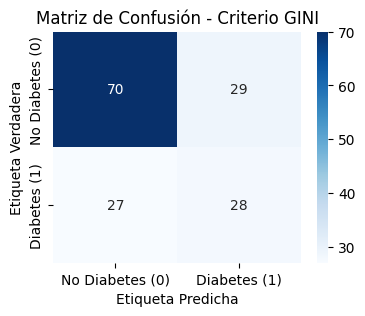

--- Resultados con Criterio: ENTROPY ---
Precisión (Accuracy): 0.6364


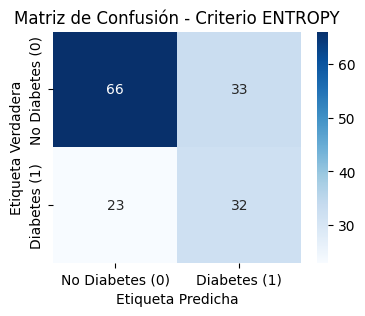

In [21]:
# Criterio 1: GINI
arbol_gini, acc_gini, imp_gini = analizar_arbol(
    X_train_final, y_train, X_value_final, y_value, 'gini'
)

# Criterio 2: ENTROPY
arbol_entropy, acc_entropy, imp_entropy = analizar_arbol(
    X_train_final, y_train, X_value_final, y_value, 'entropy'
)

# Pregunta 1: 

- El árbol que más ayuda cubre mis necesidades es el que tiene la mejor puntuación en general y el que se equivoca menos al hacer que las personas sanas se asusten.
  El Árbol ENTROPY tiene una puntuación general mucho más alta (67% vs 58%). Es mucho más cuidadoso y solo cometió 10 Falsos Positivos 8 menos que el otro arbol.


# Pregunta 2: 

- Modificación de la Función de Pureza (Poda)

- 1. Definiremos el rango a probar, es decir la cantidad de ramas maximas quiero que me saque cada arbol  y no me cree un boqlue infinito de elals.
- 2. Creamos unas listas vacias para almacenar los datos de prueba 
- 3. Entrenamos nuestro modelo.
- 4. Predecimos y evaluamos el mismo.
- 5. Guardamos los resulatos en las listas que corresponden.

In [22]:

max_depths = range(1, 11) 


gini_precision = []
entropy_precision = []

for depth in max_depths:

    arbol_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    arbol_gini.fit(X_train_final, y_train)
    
    # 2. Predecir y Evaluar
    y_pred_gini = arbol_gini.predict(X_value_final)

    # 3. Guardar el resultado
    gini_precision.append(accuracy_score(y_value, y_pred_gini))

    # -----------------------------------------------------------------
    #  ENTROPY
   
    arbol_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    arbol_entropy.fit(X_train_final, y_train)
    
    # 2. Predecir y Evaluar
    y_pred_entropy = arbol_entropy.predict(X_value_final)
    # 3. Guardar el resultado
    entropy_precision.append(accuracy_score(y_value, y_pred_entropy))



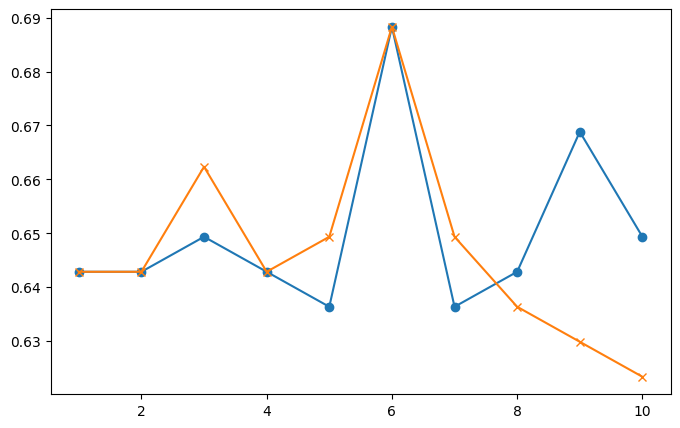

In [23]:
# Gráfico de resultados
plt.figure(figsize=(8, 5))
plt.plot(max_depths, gini_precision, label='Criterio GINI', marker='o')
plt.plot(max_depths, entropy_precision, label='Criterio ENTROPY', marker='x')


plt.show()

In [24]:
arbol_final = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
arbol_final.fit(X_train_final, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


- Segun los datos arrojados por el gráfico podemos decir que: 
  - El arbol debe tener 3 niveles de produndidad para funcionar mejor ya que se ve que cuando pasa de 3 baja bruscamente y eso debe ser por el sobre ajuste de los datos.
  - Esto nos arroja que tomar la poda establecida en max_depth=3 con el criterio entropy trasnforma un modelo que tenia 67% de precision sin poda a un de 75.8% con poda. 

# Para terminar: 
 - El modelo para el area medica se puede conciderar bueno ya que acierta casi 76 de 100 personas, se hizo más inteligente limitandolo a solo 3 ramas resolviendo el problema de sobreajustey mojorando su puntería.

# Guardar el modelo en la carpeta correspondiente.

In [25]:
Diacnostico_DB = 'arbol_decision_75_8'

joblib.dump(arbol_final, open(Diacnostico_DB, "wb"))